In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings

In [2]:
df_or=pd.read_csv('Data/raw.csv')

In [3]:
df_or.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


C:\Users\sanss\AppData\Local\Temp\ipykernel_16928\1951345879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=default_data.index,y=default_data.values, saturation=0.95, palette="rocket")


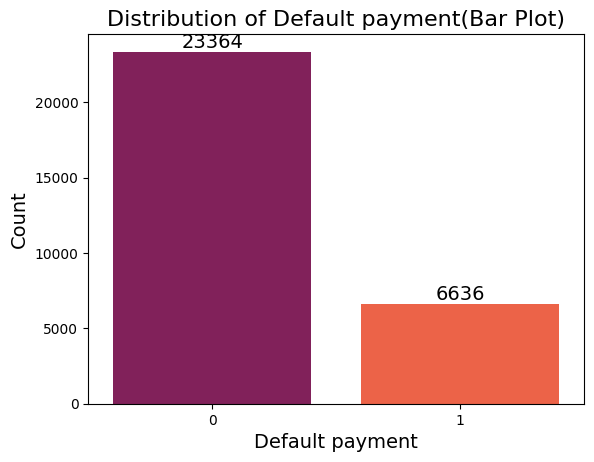

In [4]:
default_data=df_or['default_payment_next_month'].value_counts()
ax=sns.barplot(x=default_data.index,y=default_data.values, saturation=0.95, palette="rocket")
plt.title("Distribution of Default payment(Bar Plot)", fontsize=16)
plt.xlabel("Default payment", fontsize=14)
plt.ylabel("Count", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.show()

Data is imbalanced

#### Handling the imbalance of data using SMOTE

In [5]:
# Initialise SMOTE object
smote = SMOTE()
     

# Separate independent and dependent variables
X = df_or.iloc[:,:-1]
y = df_or['default_payment_next_month']
     

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)
     

# Combine balanced X and y
df_bal = pd.DataFrame(x_smote, columns=df_or.columns[:-1])
df_bal['default'] = y_smote

df_bal.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


C:\Users\sanss\AppData\Local\Temp\ipykernel_16928\3989680505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=default_data.index,y=default_data.values, saturation=0.95, palette="rocket")


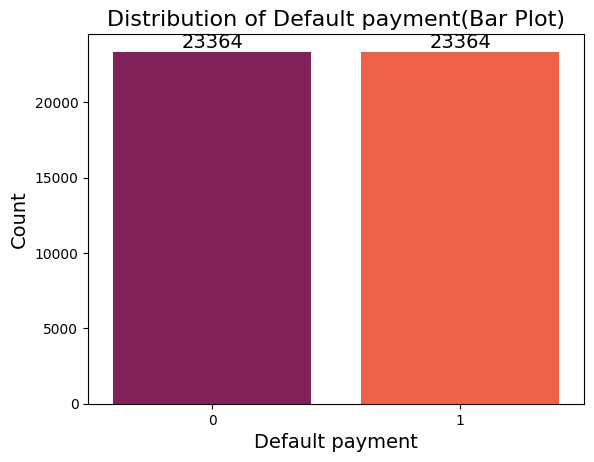

In [6]:
default_data=df_bal['default'].value_counts()
ax=sns.barplot(x=default_data.index,y=default_data.values, saturation=0.95, palette="rocket")
plt.title("Distribution of Default payment(Bar Plot)", fontsize=16)
plt.xlabel("Default payment", fontsize=14)
plt.ylabel("Count", fontsize=14)

for container in ax.containers:
    ax.bar_label(container, color='black', size=14)

plt.show()

In [7]:
df_bal.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [8]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.000000,2,2,1,24,2,2,-1,-1,...,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000
1,2,120000.000000,2,2,2,26,-1,2,0,0,...,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000
2,3,90000.000000,2,2,2,34,0,0,0,0,...,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000
3,4,50000.000000,2,2,1,37,0,0,0,0,...,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000
4,5,50000.000000,1,2,1,57,-1,0,-1,0,...,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,6837,211253.291941,1,2,1,51,0,0,0,0,...,207019.566058,142857.736102,140949.117967,143684.703139,8290.384028,10285.125557,5248.024835,5875.987582,5087.085407,5813.322985
46724,23719,226507.572668,1,1,1,28,1,2,2,2,...,34370.358496,34493.368649,35888.325013,35169.787150,2411.706431,1187.425293,984.595745,2025.459352,1301.514534,6789.642742
46725,2709,50000.000000,1,2,1,35,2,0,0,0,...,30045.488341,30296.060777,30537.565704,32016.747313,1593.769679,1538.502621,1058.881473,1069.936240,2120.162088,262.145503
46726,20086,75431.931821,1,2,1,34,2,0,0,1,...,76072.135947,75278.114594,55771.075788,18519.534074,3441.335136,3150.520456,1506.598761,1011.126136,1938.982169,543.193182


#### Feature Engineering

In [9]:
df_fr=df_bal.copy()

In [10]:
# Change column names PAY_1 to PAY_6
df_fr.rename(columns={'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JULY', 
                   'PAY_4':'PAY_JUNE', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APRIL'}, inplace=True)

# Change column names PAY_AMT_1 to PAY_AMT_6
df_fr.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JULY', 
                   'PAY_AMT4':'PAY_AMT_JUNE', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

# Change column names BILL_AMT_1 to BILL_AMT_6
df_fr.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JULY', 
                   'BILL_AMT4':'BILL_AMT_JUNE', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JULY'] + df_fr['PAY_JUNE'] + df_fr['PAY_MAY'] + df_fr['PAY_APRIL']

In [12]:
df_fr.groupby('default')['Payement_Value'].mean()

default
0   -1.980140
1    1.626648
Name: Payement_Value, dtype: float64

<Axes: xlabel='default', ylabel='Payement_Value'>

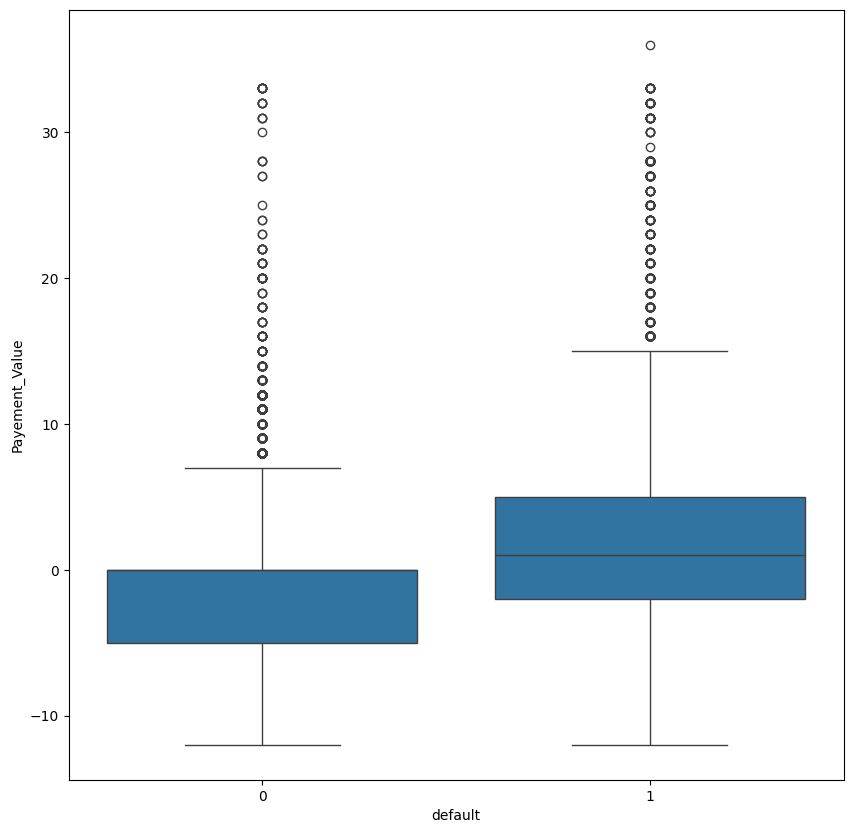

In [13]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'default', y = 'Payement_Value' )

In [14]:
df_fr['Dues'] = (df_fr['BILL_AMT_APRIL']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUNE']+df_fr['BILL_AMT_JULY']+df_fr['BILL_AMT_AUG']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APRIL']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUNE']+df_fr['PAY_AMT_JULY']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [15]:
df_fr.groupby('default')['Dues'].mean()

default
0    237459.487203
1    238391.177094
Name: Dues, dtype: float64

In [16]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [17]:
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 5, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [18]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [19]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [20]:
df_fr['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

In [21]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default,Payement_Value,Dues
0,1,20000.0,FEMALE,university,married,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,-2,7015.0
1,2,120000.0,FEMALE,university,single,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,3,12077.0
2,3,90000.0,FEMALE,university,single,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,90635.0
3,4,50000.0,FEMALE,university,married,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,222946.0
4,5,50000.0,MALE,university,married,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,-2,50290.0


#### One Hot Encoding

In [22]:
# Encoding categorical variables
df_fr = pd.get_dummies(df_fr,columns=['SEX', 'EDUCATION','MARRIAGE']).astype(int)

df_fr.head()
     

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,...,Dues,SEX_FEMALE,SEX_MALE,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,7015,1,0,0,0,0,1,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,12077,1,0,0,0,0,1,0,0,1
2,3,90000,34,0,0,0,0,0,0,29239,...,90635,1,0,0,0,0,1,0,0,1
3,4,50000,37,0,0,0,0,0,0,46990,...,222946,1,0,0,0,0,1,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,50290,0,1,0,0,0,1,1,0,0


In [23]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JULY',	'PAY_JUNE',	'PAY_MAY',	'PAY_APRIL'], drop_first = True ).astype(int)
df_fr.head()

,ID,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,...,PAY_APRIL_-1,PAY_APRIL_0,PAY_APRIL_1,PAY_APRIL_2,PAY_APRIL_3,PAY_APRIL_4,PAY_APRIL_5,PAY_APRIL_6,PAY_APRIL_7,PAY_APRIL_8
0,1,20000,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [24]:
df_fr.drop('ID',axis = 1, inplace = True)
df_fr.head()

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,...,PAY_APRIL_-1,PAY_APRIL_0,PAY_APRIL_1,PAY_APRIL_2,PAY_APRIL_3,PAY_APRIL_4,PAY_APRIL_5,PAY_APRIL_6,PAY_APRIL_7,PAY_APRIL_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,1,0,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,1,0,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,1,0,0,0,0,0,0,0,0


#### Prepearing X & Y Variables

In [25]:
X = df_fr.drop(['default','Payement_Value','Dues'],axis=1)
y = df_fr['default']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((31307, 83), (15421, 83), (31307,), (15421,))

In [26]:
models={
    "SVM":SVC(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":XGBClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "CatBoost":CatBoostClassifier()

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Trainig set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1= f1_score(y_train,y_train_pred,average='weighted')
    model_train_Precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1= f1_score(y_test,y_test_pred,average='weighted')
    model_test_Precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- f1-score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_Precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))
    


    print("-----------------------------------")

    print('Model Performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- f1-score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_Precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')
    


SVM
Model Performance for Training set
- Accuracy: 0.7853
- f1-score: 0.7842
- Precision: 0.8310
- Recall: 0.7158
- ROC AUC Score: 0.7852
-----------------------------------
Model Performance for Test set
- Accuracy: 0.7723
- f1-score: 0.7713
- Precision: 0.8147
- Recall: 0.7061
- ROC AUC Score: 0.7724


Decision Tree
Model Performance for Training set
- Accuracy: 0.9994
- f1-score: 0.9994
- Precision: 0.9998
- Recall: 0.9989
- ROC AUC Score: 0.9994
-----------------------------------
Model Performance for Test set
- Accuracy: 0.7394
- f1-score: 0.7394
- Precision: 0.7332
- Recall: 0.7543
- ROC AUC Score: 0.7394


Random Forest
Model Performance for Training set
- Accuracy: 0.9994
- f1-score: 0.9994
- Precision: 0.9995
- Recall: 0.9992
- ROC AUC Score: 0.9994
-----------------------------------
Model Performance for Test set
- Accuracy: 0.8293
- f1-score: 0.8291
- Precision: 0.8482
- Recall: 0.8028
- ROC AUC Score: 0.8293


XGBoost
Model Performance for Training set
- Accuracy: 0.8888


d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Model Performance for Training set
- Accuracy: 0.7609
- f1-score: 0.7605
- Precision: 0.7834
- Recall: 0.7205
- ROC AUC Score: 0.7608
-----------------------------------
Model Performance for Test set
- Accuracy: 0.7566
- f1-score: 0.7562
- Precision: 0.7777
- Recall: 0.7197
- ROC AUC Score: 0.7566


Learning rate set to 0.04483
0:	learn: 0.6774137	total: 161ms	remaining: 2m 41s
1:	learn: 0.6631088	total: 167ms	remaining: 1m 23s
2:	learn: 0.6522205	total: 176ms	remaining: 58.3s
3:	learn: 0.6408364	total: 182ms	remaining: 45.4s
4:	learn: 0.6302159	total: 192ms	remaining: 38.3s
5:	learn: 0.6215152	total: 200ms	remaining: 33.2s
6:	learn: 0.6125501	total: 209ms	remaining: 29.7s
7:	learn: 0.6041995	total: 216ms	remaining: 26.8s
8:	learn: 0.5963955	total: 225ms	remaining: 24.8s
9:	learn: 0.5895484	total: 232ms	remaining: 23s
10:	learn: 0.5833304	total: 239ms	remaining: 21.5s
11:	learn: 0.5786947	total: 248ms	remaining: 20.4s
12:	learn: 0.5735976	total: 256ms	remaining: 19.4s
13:	lea

In [27]:
models={
    "SVM":SVC(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "XGBoost":XGBClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "CatBoost":CatBoostClassifier()

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(list(models.keys())[i])

    print ('classification_Report')
    print (classification_report(y_test,y_test_pred))

    print('='*35)
    print('\n')

SVM
classification_Report
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      7696
           1       0.81      0.71      0.76      7725

    accuracy                           0.77     15421
   macro avg       0.78      0.77      0.77     15421
weighted avg       0.78      0.77      0.77     15421



Decision Tree
classification_Report
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      7696
           1       0.73      0.75      0.74      7725

    accuracy                           0.74     15421
   macro avg       0.74      0.74      0.74     15421
weighted avg       0.74      0.74      0.74     15421



Random Forest
classification_Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      7696
           1       0.85      0.80      0.83      7725

    accuracy                           0.83     15421
   macro avg       0.83   

d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
classification_Report
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      7696
           1       0.78      0.72      0.75      7725

    accuracy                           0.76     15421
   macro avg       0.76      0.76      0.76     15421
weighted avg       0.76      0.76      0.76     15421



Learning rate set to 0.04483
0:	learn: 0.6774137	total: 8.6ms	remaining: 8.59s
1:	learn: 0.6631088	total: 16.1ms	remaining: 8.05s
2:	learn: 0.6522205	total: 24.3ms	remaining: 8.08s
3:	learn: 0.6408364	total: 32.2ms	remaining: 8.01s
4:	learn: 0.6302159	total: 41.5ms	remaining: 8.25s
5:	learn: 0.6215152	total: 49.3ms	remaining: 8.16s
6:	learn: 0.6125501	total: 57.2ms	remaining: 8.12s
7:	learn: 0.6041995	total: 65ms	remaining: 8.06s
8:	learn: 0.5963955	total: 73.2ms	remaining: 8.06s
9:	learn: 0.5895484	total: 80.7ms	remaining: 7.99s
10:	learn: 0.5833304	total: 89.3ms	remaining: 8.03s
11:	learn: 0.5786947	total: 97.2ms	remaining: 8s
12:

In [28]:
model_names = []
model_train_accuracy = []
model_test_accuracy = []
model_test_precision = []
model_test_recall = []
model_test_f1 = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_names.append(name)
    model_train_accuracy.append(accuracy_score(y_train, model.predict(X_train))*100)
    model_test_accuracy.append(accuracy_score(y_test, y_pred)*100)
    model_test_precision.append(precision_score(y_test, y_pred)*100)
    model_test_recall.append(recall_score(y_test, y_pred)*100)
    model_test_f1.append(f1_score(y_test, y_pred)*100)

# Create a DataFrame summarizing the metrics
metrics_df = pd.DataFrame({
    'Classifier': model_names,
    'Train Accuracy': model_train_accuracy,
    'Test Accuracy': model_test_accuracy,
    'Precision Score': model_test_precision,
    'Recall Score': model_test_recall,
    'F1 Score': model_test_f1
})

# Display the DataFrame
print(metrics_df)


d:\DateScience\Credit_Card_Default_Prdiction\.sanenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.04483
0:	learn: 0.6774137	total: 9.27ms	remaining: 9.26s
1:	learn: 0.6631088	total: 17.8ms	remaining: 8.88s
2:	learn: 0.6522205	total: 26.2ms	remaining: 8.72s
3:	learn: 0.6408364	total: 36.1ms	remaining: 8.99s
4:	learn: 0.6302159	total: 44.4ms	remaining: 8.83s
5:	learn: 0.6215152	total: 53.8ms	remaining: 8.91s
6:	learn: 0.6125501	total: 62.7ms	remaining: 8.89s
7:	learn: 0.6041995	total: 70.2ms	remaining: 8.7s
8:	learn: 0.5963955	total: 82ms	remaining: 9.03s
9:	learn: 0.5895484	total: 89.6ms	remaining: 8.87s
10:	learn: 0.5833304	total: 97.6ms	remaining: 8.78s
11:	learn: 0.5786947	total: 106ms	remaining: 8.75s
12:	learn: 0.5735976	total: 115ms	remaining: 8.7s
13:	learn: 0.5673800	total: 122ms	remaining: 8.62s
14:	learn: 0.5637951	total: 130ms	remaining: 8.57s
15:	learn: 0.5596518	total: 138ms	remaining: 8.49s
16:	learn: 0.5556188	total: 147ms	remaining: 8.48s
17:	learn: 0.5515640	total: 154ms	remaining: 8.41s
18:	learn: 0.5486058	total: 163ms	remaining: 8.39s
19:	l

#### Insights
- From the above results, RandomForest Classifier gives the best performance
- In RandomForest Classifier , we are getting around 99% Train accuracy and 83% for Test accuracy which depicts that model is overfitting.
- From the above results, RandomForest gives higher recall(80%) and higer f1-score(82%), whish is not bad

### RandomForest Classifier

In [29]:
rf_cl=RandomForestClassifier()
rf_cl.fit(X_train, y_train)

y_pred=rf_cl.predict(X_test)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cdf = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("\nConfusion Matrix:")
print(cdf)


Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0         6609         1087
Actual 1         1534         6191


#### Hyperparameter Training


In [30]:
rf_params = {"max_depth":[5,8,15,None,10],
             "max_features":[5,7,"sqrt",8],
             "min_samples_split":[2,8,15,20],
             "n_estimators":[100,200,500,1000]}

rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'sqrt', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [31]:
# model List for Hyperparameter training
randomcv_models = [
                   ("RF", RandomForestClassifier(),rf_params),
                       
                    ]
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'sqrt', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [32]:
from sklearn.model_selection import RandomizedSearchCV

model_param ={}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"-----------------Best Params for {model_name}--------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
-----------------Best Params for RF--------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [34]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=500, min_samples_split = 2, max_features = 8, max_depth = None),
    

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Trainig set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1= f1_score(y_train,y_train_pred,average='weighted')
    model_train_Precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1= f1_score(y_test,y_test_pred,average='weighted')
    model_test_Precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- f1-score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_Precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))
    


    print("-----------------------------------")

    print('Model Performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- f1-score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_Precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')
    

Random Forest
Model Performance for Training set
- Accuracy: 0.9994
- f1-score: 0.9994
- Precision: 0.9995
- Recall: 0.9992
- ROC AUC Score: 0.9994
-----------------------------------
Model Performance for Test set
- Accuracy: 0.8326
- f1-score: 0.8325
- Precision: 0.8512
- Recall: 0.8070
- ROC AUC Score: 0.8327




In [36]:
# Define the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth=None),
}

# Fit the model and retrieve feature importances
for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Retrieve feature importances
    feature_importances = model.feature_importances_
    
    # Print the number of features and their importance
    print(f"Model: {name}")
    print(f"Number of features: {len(feature_importances)}")
    print("Feature Importances:")
    for i, importance in enumerate(feature_importances):
        print(f"Feature {i+1}: {importance:.4f}")


    

Model: Random Forest
Number of features: 83
Feature Importances:
Feature 1: 0.0578
Feature 2: 0.0495
Feature 3: 0.0543
Feature 4: 0.0481
Feature 5: 0.0449
Feature 6: 0.0435
Feature 7: 0.0424
Feature 8: 0.0420
Feature 9: 0.0526
Feature 10: 0.0478
Feature 11: 0.0432
Feature 12: 0.0413
Feature 13: 0.0391
Feature 14: 0.0426
Feature 15: 0.0194
Feature 16: 0.0182
Feature 17: 0.0094
Feature 18: 0.0106
Feature 19: 0.0016
Feature 20: 0.0078
Feature 21: 0.0193
Feature 22: 0.0010
Feature 23: 0.0166
Feature 24: 0.0075
Feature 25: 0.0187
Feature 26: 0.0172
Feature 27: 0.0278
Feature 28: 0.0013
Feature 29: 0.0002
Feature 30: 0.0001
Feature 31: 0.0000
Feature 32: 0.0000
Feature 33: 0.0000
Feature 34: 0.0059
Feature 35: 0.0092
Feature 36: 0.0243
Feature 37: 0.0149
Feature 38: 0.0009
Feature 39: 0.0003
Feature 40: 0.0001
Feature 41: 0.0000
Feature 42: 0.0000
Feature 43: 0.0000
Feature 44: 0.0051
Feature 45: 0.0065
Feature 46: 0.0202
Feature 47: 0.0074
Feature 48: 0.0006
Feature 49: 0.0002
Feature 50: 0

In [44]:
X1 = df_fr.drop(['default','Payement_Value','Dues'],axis=1)
X1

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,...,PAY_APRIL_-1,PAY_APRIL_0,PAY_APRIL_1,PAY_APRIL_2,PAY_APRIL_3,PAY_APRIL_4,PAY_APRIL_5,PAY_APRIL_6,PAY_APRIL_7,PAY_APRIL_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,1,0,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,1,0,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,211253,51,215526,205375,207019,142857,140949,143684,8290,10285,...,0,1,0,0,0,0,0,0,0,0
46724,226507,28,34004,35737,34370,34493,35888,35169,2411,1187,...,0,0,0,1,0,0,0,0,0,0
46725,50000,35,28394,29272,30045,30296,30537,32016,1593,1538,...,0,1,0,0,0,0,0,0,0,0
46726,75431,34,73073,74710,76072,75278,55771,18519,3441,3150,...,0,1,0,0,0,0,0,0,0,0


C:\Users\sanss\AppData\Local\Temp\ipykernel_16928\295107374.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


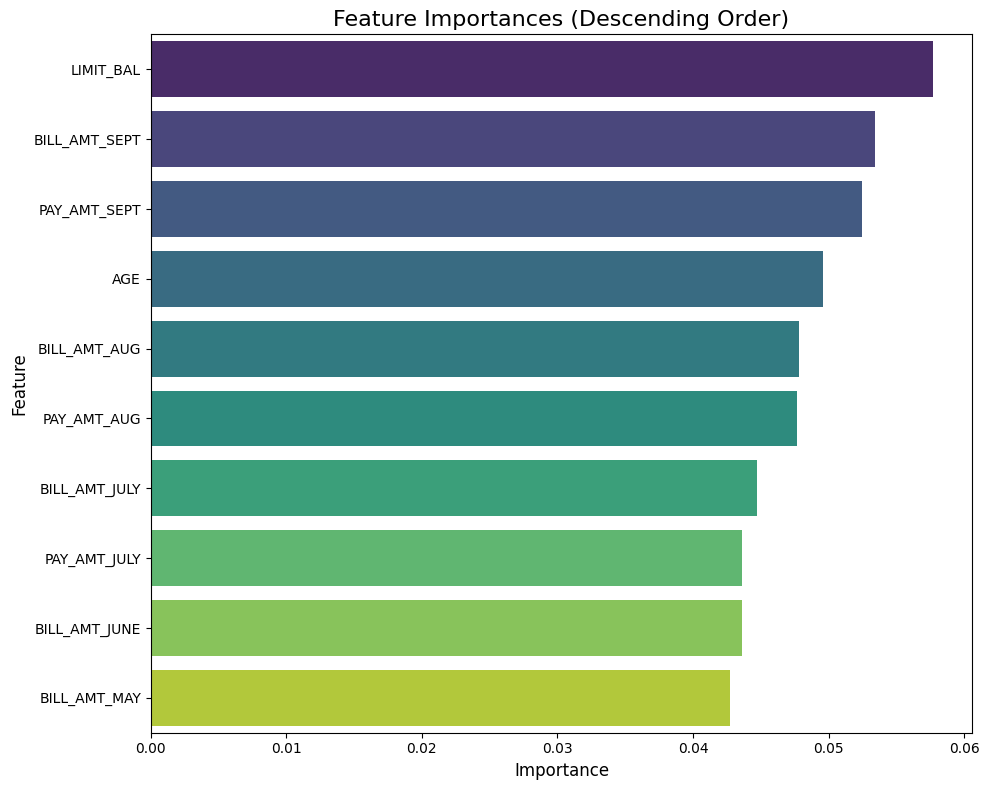

In [46]:
# Fit the Random Forest model (replace X_train, y_train with your data)
rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Retrieve feature importances and feature names
feature_importances = rf_model.feature_importances_
feature_names = X1.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)[:10]

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(
    data=importance_df,
    x='Importance',
    y='Feature',
    palette="viridis"
)
plt.title("Feature Importances (Descending Order)", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

In [51]:
df_imp = X1[feature_names[:20]]
df_imp['default'] = df_fr['default']
df_imp.head()

C:\Users\sanss\AppData\Local\Temp\ipykernel_16928\1627338506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp['default'] = df_fr['default']


,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,...,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,SEX_FEMALE,SEX_MALE,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,default
0,20000,24,3913,3102,689,0,0,0,0,689,...,0,0,0,1,0,0,0,0,1,1
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,1000,0,2000,1,0,0,0,0,1,1
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,1000,1000,5000,1,0,0,0,0,1,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,1100,1069,1000,1,0,0,0,0,1,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,9000,689,679,0,1,0,0,0,1,0


In [52]:
X_imp = df_imp.drop('default',axis=1)
y_imp = df_imp['default']

X_imp = scaler.fit_transform(X_imp)
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp, y_imp, test_size=0.2, random_state=42)

In [53]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=500, min_samples_split = 2, max_features = 8, max_depth = None),
    

}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_imp_train, y_imp_train)
    
    # Make Predictions
    y_imp_train_pred = model.predict(X_imp_train)
    y_imp_test_pred = model.predict(X_imp_test)
    
    # Trainig set performance
    model_train_accuracy = accuracy_score(y_imp_train, y_imp_train_pred)
    model_train_f1= f1_score(y_imp_train,y_imp_train_pred,average='weighted')
    model_train_Precision = precision_score(y_imp_train, y_imp_train_pred)
    model_train_recall = recall_score(y_imp_train, y_imp_train_pred)
    model_train_rocauc_score = roc_auc_score(y_imp_train, y_imp_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_imp_test, y_imp_test_pred)
    model_test_f1= f1_score(y_imp_test,y_imp_test_pred,average='weighted')
    model_test_Precision = precision_score(y_imp_test, y_imp_test_pred)
    model_test_recall = recall_score(y_imp_test, y_imp_test_pred)
    model_test_rocauc_score = roc_auc_score(y_imp_test, y_imp_test_pred)


    print(list(models.keys())[i])

    print('Model Performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- f1-score: {:.4f}".format(model_train_f1))
    print("- Precision: {:.4f}".format(model_train_Precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- ROC AUC Score: {:.4f}".format(model_train_rocauc_score))
    


    print("-----------------------------------")

    print('Model Performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- f1-score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_Precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Random Forest
Model Performance for Training set
- Accuracy: 0.9987
- f1-score: 0.9987
- Precision: 0.9983
- Recall: 0.9991
- ROC AUC Score: 0.9987
-----------------------------------
Model Performance for Test set
- Accuracy: 0.8113
- f1-score: 0.8113
- Precision: 0.8138
- Recall: 0.8082
- ROC AUC Score: 0.8113




### ROC AUC Score

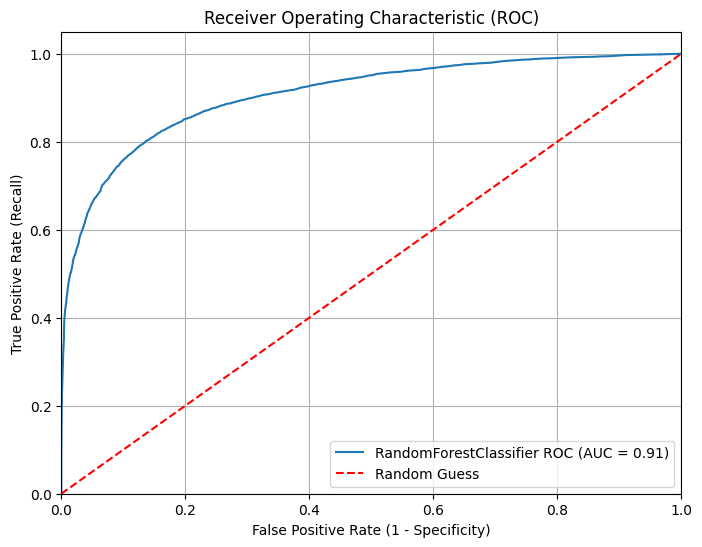

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score


# Define models with AUC
auc_models = [
    {
        'label': 'RandomForestClassifier',
        'model': RandomForestClassifier(n_estimators=500, min_samples_split=2, max_features=8, max_depth=None),
    }
]

# Initialize plot
plt.figure(figsize=(8, 6))

for algo in auc_models:
    model = algo['model']
    label = algo['label']

    # Train model
    model.fit(X_train, y_train)

    # Get predicted probabilities for class 1
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{label} ROC (AUC = {auc:.2f})')

# Add diagonal line (random guess)
plt.plot([0, 1], [0, 1], 'r--', label="Random Guess")

# Customize plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()

# Save and show plot
plt.savefig('auc.png')
plt.show()
